## Analyze Fiit's Like Study (Line) Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style = "whitegrid")

In [2]:
def getAngle(cnt, cycle = 11) :
    
    n = (cnt%2 * cycle//2 + cnt//2 + cnt%2) % cycle
    angle = (360/cycle)*n
    
    return angle

In [3]:
# Effective Target Angel : Except smallest two, Largest two, and three middle Angle

def isEffAngle(cnt, cycle = 11) :
    
    EffAngle = []
    for i in range(1, cycle+1) :
        
        Center = cycle//2 + 1
        
        if (i > 2 and i < Center-1) or (i > Center+1 and i < cycle-1) : 
            EffAngle.append(i)
            
    return cnt in EffAngle
        

In [4]:
_dir = r"DualSensorMouse_Fittslike_Fade\Logs"

# os.listdir(_dir)

In [5]:
Username = "BMH"
UsernameC = "_fade_1"

In [6]:
_dirC = _dir+f"/{Username+UsernameC}"

In [7]:
dirlstW = os.listdir(_dirC)
dirlstW

['2024_03_15_16_34_19_Practice_1200_50_logs']

---

In [8]:
dflstW = []

for dw in dirlstW :
    
    Dirw = _dirC + f"/{dw}/Pos_values.csv"
    dfw = pd.read_csv(Dirw)
    dfw = dfw[dfw["Success"] == "T"]
    dflstW.append(dfw)

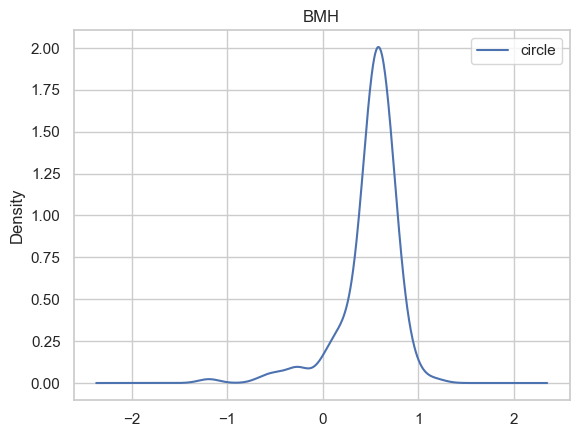

In [9]:
for dfw in dflstW :
    
    dfw["PositionValue"].plot.density(label="circle")
    plt.legend()
    plt.title(Username)

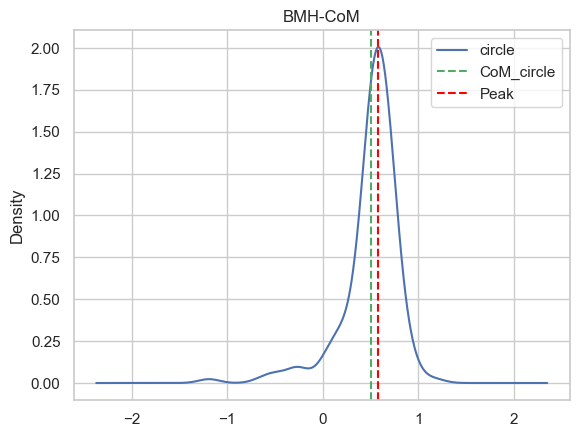

Peak: 0.58
CoM: 0.50083857442348


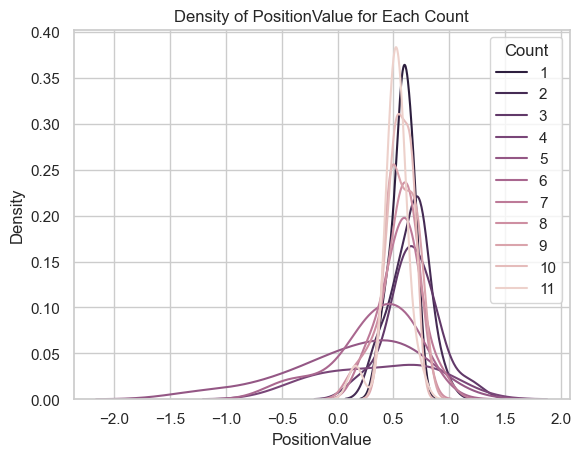

In [10]:
data_dfw = dfw["PositionValue"]

histw, bin_edgesw = np.histogram(data_dfw, bins=30, density=True)

bin_centersw = (bin_edgesw[:-1] + bin_edgesw[1:]) / 2

com_dfw = np.sum(bin_centersw * histw) / np.sum(histw)

dfw["PositionValue"].plot.density(label="circle")
plt.axvline(x=com_dfw, color='g', linestyle='--', label='CoM_circle')
plt.legend()
plt.title(Username+"-CoM")
max_density_index = np.argmax(histw)
peak_x_value = bin_centersw[max_density_index]
peak_y_value = histw[max_density_index]

plt.axvline(x=peak_x_value, color='red', linestyle='--', label='Peak')
plt.legend()
plt.show()

print("Peak:",peak_x_value)
print("CoM:",com_dfw)

sns.kdeplot(data=dfw, x="PositionValue", hue="Count", label="Count")

plt.title('Density of PositionValue for Each Count')
plt.xlabel('PositionValue')
plt.ylabel('Density')
plt.legend(title="Count", labels=dfw["Count"].unique())
plt.show()


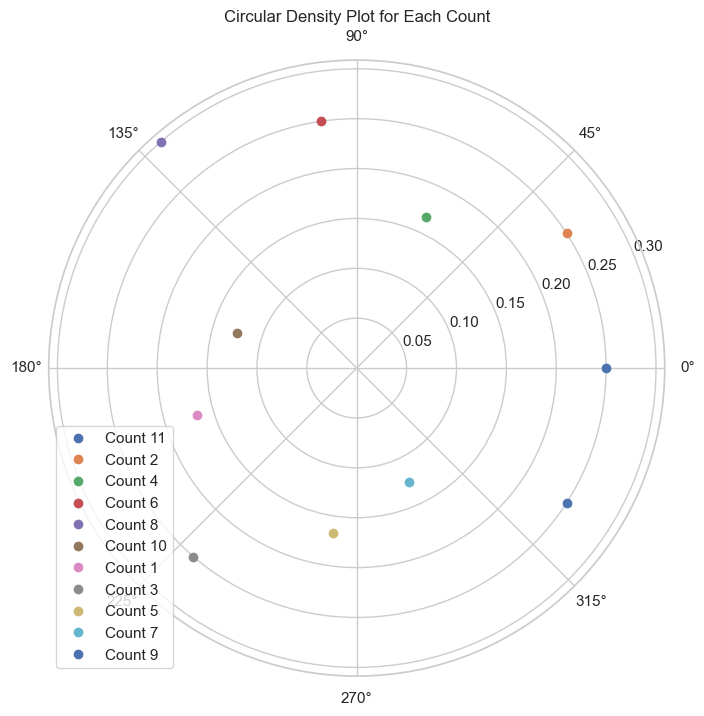

In [11]:
desired_order = [11, 2, 4, 6, 8, 10, 1, 3, 5, 7, 9]

unique_counts = [count for count in desired_order if count in dfw["Count"].unique()]

plt.figure(figsize=(8, 8))

for count in unique_counts:
    data_subset = dfw[dfw["Count"] == count]
    density_values, _ = np.histogram(data_subset["PositionValue"], bins=30, density=True)
    density_values = density_values / density_values.max()  # 정규화
    radius = np.mean(density_values)
    angles = np.linspace(0, 2 * np.pi, len(unique_counts), endpoint=False)
    plt.polar(angles[unique_counts.index(count)], radius, 'o', label=f'Count {count}')

plt.title('Circular Density Plot for Each Count')
plt.legend()
plt.show()